In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('sampledata.xlsx')
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


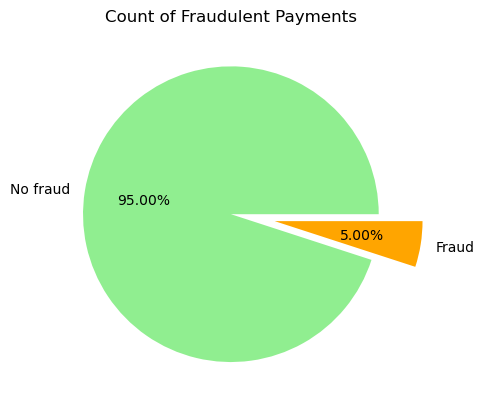

Number of normal transactions:  95
Number of fraud transactions:  5


In [5]:
b = data.fraud.value_counts()
plt.pie(b , autopct='%.2f%%', colors=['lightgreen', 'orange'], labels = ['No fraud','Fraud'], explode = (0, 0.3))
plt.title("Count of Fraudulent Payments")
plt.show()

df_fraud = data.loc[data.fraud == 1] 
df_non_fraud = data.loc[data.fraud == 0]
print("Number of normal transactions: ",df_non_fraud.fraud.count())
print("Number of fraud transactions: ",df_fraud.fraud.count())

In [6]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(data)

In [7]:
sample = model.sample(340825)
sample.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1769470125','2','M','28007','M348934600','28007','es_transportation',62.24,0
1,0,'C337109624','4','F','28007','M480139044','28007','es_transportation',75.51,0
2,0,'C986553990','5','F','28007','M348934600','28007','es_transportation',82.86,0
3,0,'C819690995','3','F','28007','M348934600','28007','es_transportation',59.73,0
4,0,'C1697528836','4','M','28007','M348934600','28007','es_transportation',58.90,0


In [8]:
model = GaussianCopula(primary_key='customer')
model.fit(data)

In [20]:
from sdv.evaluation import evaluate
evaluate(sample, data, metrics=['CSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.993922,0.993922,0.0,1.0,MAXIMIZE,None


In [14]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340825 entries, 0 to 340824
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         340825 non-null  int64  
 1   customer     340825 non-null  object 
 2   age          340825 non-null  object 
 3   gender       340825 non-null  object 
 4   zipcodeOri   340825 non-null  object 
 5   merchant     340825 non-null  object 
 6   zipMerchant  340825 non-null  object 
 7   category     340825 non-null  object 
 8   amount       340825 non-null  float64
 9   fraud        340825 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 26.0+ MB


In [15]:
sample.shape[:]

(340825, 10)

In [16]:
sample.describe()

,step,amount,fraud
count,340825.0,340825.000000,340825.000000
mean,0.0,42.500434,0.025567
std,0.0,31.429580,0.157841
min,0.0,0.930000,0.000000
25%,0.0,17.500000,0.000000
50%,0.0,36.030000,0.000000
75%,0.0,60.950000,0.000000
max,0.0,236.300000,1.000000


In [17]:
duplicates = sample[sample.duplicated(keep='first')]

In [18]:
duplicates

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
1750,0,'C1551465414','3','F','28007','M348934600','28007','es_transportation',5.22,0
4187,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',3.15,0
4614,0,'C1087788850','2','M','28007','M348934600','28007','es_transportation',2.40,0
6032,0,'C1697528836','3','M','28007','M348934600','28007','es_transportation',35.63,0
8763,0,'C986553990','2','M','28007','M348934600','28007','es_transportation',11.69,0
...,...,...,...,...,...,...,...,...,...,...
340752,0,'C1622124632','3','M','28007','M348934600','28007','es_transportation',5.38,0
340756,0,'C506520283','2','M','28007','M348934600','28007','es_transportation',16.11,0
340763,0,'C327430270','2','F','28007','M348934600','28007','es_transportation',8.16,0
340771,0,'C1425441042','3','F','28007','M348934600','28007','es_transportation',44.41,0


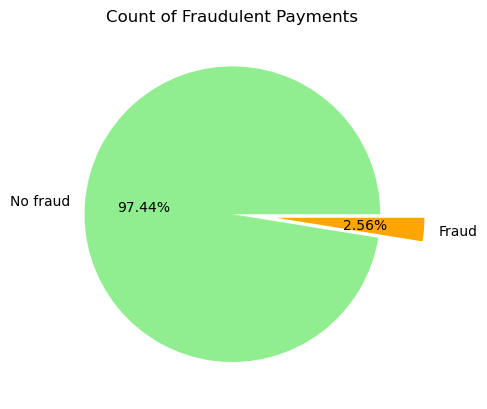

Number of normal transactions:  332111
Number of fraud transactions:  8714


In [19]:
a = sample.fraud.value_counts()
plt.pie(a , autopct='%.2f%%', colors=['lightgreen', 'orange'], labels = ['No fraud','Fraud'], explode = (0, 0.3))
plt.title("Count of Fraudulent Payments")
plt.show()

df_fraud = sample.loc[sample.fraud == 1] 
df_non_fraud = sample.loc[sample.fraud == 0]
print("Number of normal transactions: ",df_non_fraud.fraud.count())
print("Number of fraud transactions: ",df_fraud.fraud.count())
